# Torsion elastique

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath
from options import *
from constants import *

from scipy.signal import argrelextrema # for local extremum

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

In [2]:
def load(filename: str):
    return pd.read_csv(filename)

In [3]:
laiton_raw1 = load('../data/laiton1.csv')
laiton_raw2 = load('../data/laiton2.csv')
laiton_raw3 = load('../data/laiton3.csv')
laiton_raw = [laiton_raw1, laiton_raw2, laiton_raw3]


acier_raw1 = load('../data/acier1.csv')
acier_raw2 = load('../data/acier2.csv')
acier_raw3 = load('../data/acier3.csv')
acier_raw = [acier_raw1, acie_raw2, acier_raw3]


magnesium_raw1 = load('../data/magnesium1.csv')
magnesium_raw2 = load('../data/magnesium2.csv')
magnesium_raw3 = load('../data/magnesium3.csv')
magnesium_raw = [magnesium_raw1, magnesium_raw2, magnesium_raw3]

NameError: name 'acie_raw2' is not defined

In [ ]:
# Moment d'inertie pendule
I = (masse_disque * (diametre_disque/2)**2)/2

In [ ]:
def plot_datas_pd(datas, **kwargs):
    temps = unp.uarray(datas["Temps [s]"], delta_temps)
    tension = unp.uarray(datas["Tension [V]"], delta_tension)
    plt.plot(nom_vals(temps), nom_vals(tension), **kwargs)

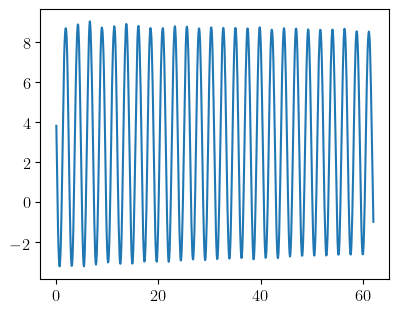

In [ ]:
plot_datas_pd(laiton_raw1)

## Centrer données

In [ ]:
laiton = []
acier = []
magnesium = []

for el in (laiton_raw):
    temps = unp.uarray(el["Temps [s]"], delta_temps)
    tension = unp.uarray(el["Tension [V]"], delta_tension)
    average = np.mean(tension)
    laiton.append((temps, tension-average))

for el in (acier_raw):
    temps = unp.uarray(el["Temps [s]"], delta_temps)
    tension = unp.uarray(el["Tension [V]"], delta_tension)
    average = np.mean(tension)
    acier.append((temps, tension-average))

for el in (magnesium_raw):
    temps = unp.uarray(el["Temps [s]"], delta_temps)
    tension = unp.uarray(el["Tension [V]"], delta_tension)
    average = np.mean(tension)
    magnesium.append((temps, tension-average))


In [ ]:
def plot_datas(datas, **kwargs):
    plt.plot(nom_vals(datas[0]), nom_vals(datas[1]), **kwargs)

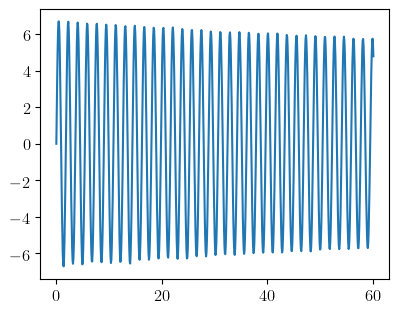

In [ ]:
plot_datas(acier[1])


## Analyse classique oscillations

In [ ]:
def local_max(datas):
    max_ind = argrelextrema(datas[1], np.greater)
    return max_ind

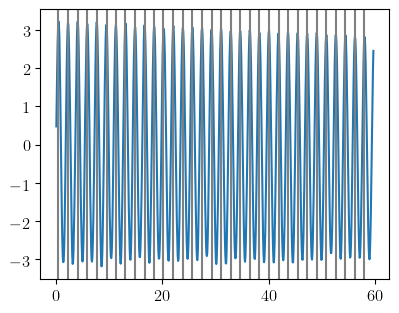

In [ ]:

times_max = acier[0][0][local_max(acier[0])]

plot_datas(acier[0])
for i in times_max:
    plt.axvline(x = nom_vals(i))


## Décrément logarithmique

## FEUR

In [ ]:
def fit_line(data):
    masse_sus = unp.uarray(data["Masse [g]"], delta_masse)
    start = unp.uarray(data["Start [cm]"], delta_regle_laser)
    stop = unp.uarray(data["Stop [cm]"], delta_regle_laser)
    deviation = stop - start

    theta = 0.5 * unp.arctan(deviation / distance_regle)
    P = masse_sus * g
    coefs, cov = np.polyfit(nom_vals(P), nom_vals(theta), 1, cov=True)
    coefs_err = unp.uarray(coefs, np.sqrt(np.diag(cov)))
    fit_func = np.poly1d(coefs)
    return coefs_err, fit_func


In [ ]:
def plot_and_print_fit(data, **kwargs):
    coefs_err, fit_func = fit_line(data)
    print(f"Pente: {coefs_err[0]:.2ueP} ({coefs_err[0]:.2ueL})")
    masse_sus = unp.uarray(data["Masse [g]"], delta_masse)
    P = masse_sus * g
    plt.plot(nom_vals(P), fit_func(nom_vals(P)), '--', label='$y = ({:.1ueL})x + ({:.1ueL})$'.format(*coefs_err), **kwargs)

In [ ]:
print(f'Laiton (longueur = {laiton["Longueur [cm]"][0]:.0f} cm)')
plot_data(laiton, label=f'Laiton ($\\diameter={epaisseur_tige_laiton.n:.1f}$ \\si{{\\centi\\meter}})')
plot_and_print_fit(laiton)
print(f'Acier (longueur = {acier["Longueur [cm]"][0]:.0f} cm)')
plot_data(acier, label=f'Acier ($\\diameter={epaisseur_tige_acier.n:.1f}$ \\si{{\\centi\\meter}})')
plot_and_print_fit(acier)
print(f'Magnesium (longueur = {magnesium["Longueur [cm]"][0]:.0f} cm)')
plot_data(magnesium, label=f'Magnesium ($\\diameter={epaisseur_tige_magnesium.n:.1f}$ \\si{{\\centi\\meter}})')
plot_and_print_fit(magnesium)
plt.xlabel(r'P [\si{\newton}]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend(loc="center left", bbox_to_anchor=(1.1, 0.5))
plt.grid()
# plt.savefig('../figures/methode_statique_masse.pdf')

Laiton (longueur = 25 cm)


Pente: (6.47±0.11)×10⁻⁶ (\left(6.47 \pm 0.11\right) \times 10^{-6})
Acier (longueur = 25 cm)
Pente: (2.564±0.015)×10⁻⁶ (\left(2.564 \pm 0.015\right) \times 10^{-6})
Magnesium (longueur = 25 cm)
Pente: (9.57±0.12)×10⁻⁷ (\left(9.57 \pm 0.12\right) \times 10^{-7})
Error in callback <function _draw_all_if_interactive at 0x7f15518d79c0> (for post_execute):


KeyboardInterrupt: 